# Congressional Voting Data Set

In [2]:
%pip install -r requirements.txt -q


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import openpyxl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
import squarify
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## Loading Data

In [4]:
df_voting = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')
df_voting_test = pd.read_csv('data/CongressionalVotingID.shuf.tes.csv')

## Data Description

In [102]:
display(df_voting.head(5))
df_voting.info(verbose=True)

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,,
362,democrat,y,n,y,n,y,y,y,n,y,y,n,n,y,y,n,unknown
86,democrat,n,n,y,n,y,y,n,n,n,y,y,y,y,y,n,y
264,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,unknown
258,republican,n,n,n,y,y,n,n,n,n,n,n,y,n,y,unknown,y
381,democrat,y,y,y,n,n,y,unknown,y,y,n,y,n,y,n,y,y


<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 362 to 34
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   class                                   218 non-null    object
 1   handicapped-infants                     218 non-null    object
 2   water-project-cost-sharing              218 non-null    object
 3   adoption-of-the-budget-resolution       218 non-null    object
 4   physician-fee-freeze                    218 non-null    object
 5   el-salvador-aid                         218 non-null    object
 6   religious-groups-in-schools             218 non-null    object
 7   anti-satellite-test-ban                 218 non-null    object
 8   aid-to-nicaraguan-contras               218 non-null    object
 9   mx-missile                              218 non-null    object
 10  immigration                             218 non-null    object
 11  synfuels-c

This data set has 218 entries and 18 attributes. The target value of this data set is class so what party the people are part of. We want in this classification task to predict based on the questions voters answered with either yes "y" or no "n". So the rest of the attributes are all binary data. There are no missing values per se but some questions were answered with unkown so we have to look how we want to deal with this missing values.

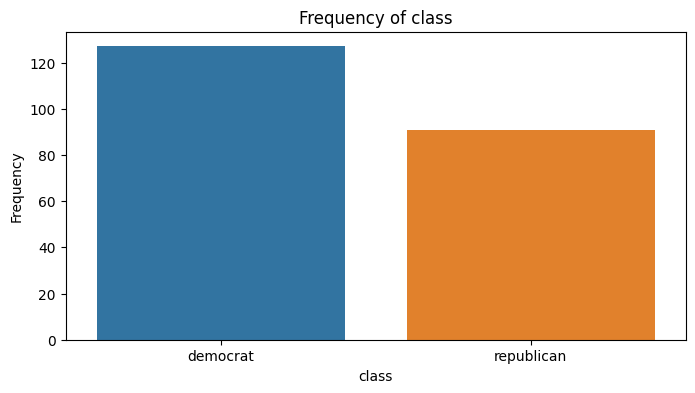

In [103]:
df_voting.columns

plt.figure(figsize=(8, 4))
sns.countplot(x='class', hue='class', data=df_voting)
plt.title('Frequency of class')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()

From the frequency table we can see that there are more democrats than republicans in the data set.

In [104]:
for i in df_voting.columns[1:]:
    contingency_table = pd.crosstab(index=df_voting['class'], columns=df_voting[i], margins=True)
    display(contingency_table)

handicapped-infants,n,unknown,y,All
class,,,,
democrat,41,3,83,127
republican,68,1,22,91
All,109,4,105,218


water-project-cost-sharing,n,unknown,y,All
class,,,,
democrat,57,15,55,127
republican,33,13,45,91
All,90,28,100,218


adoption-of-the-budget-resolution,n,unknown,y,All
class,,,,
democrat,8,6,113,127
republican,79,2,10,91
All,87,8,123,218


physician-fee-freeze,n,unknown,y,All
class,,,,
democrat,117,5,5,127
republican,2,1,88,91
All,119,6,93,218


el-salvador-aid,n,unknown,y,All
class,,,,
democrat,100,6,21,127
republican,4,1,86,91
All,104,7,107,218


religious-groups-in-schools,n,unknown,y,All
class,,,,
democrat,69,5,53,127
republican,7,1,83,91
All,76,6,136,218


anti-satellite-test-ban,n,unknown,y,All
class,,,,
democrat,25,4,98,127
republican,68,3,20,91
All,93,7,118,218


aid-to-nicaraguan-contras,n,unknown,y,All
class,,,,
democrat,17,3,107,127
republican,72,9,10,91
All,89,12,117,218


mx-missile,n,unknown,y,All
class,,,,
democrat,27,7,93,127
republican,80,1,10,91
All,107,8,103,218


immigration,n,unknown,y,All
class,,,,
democrat,71,2,54,127
republican,45,1,45,91
All,116,3,99,218


synfuels-crporation-cutback,n,unknown,y,All
class,,,,
democrat,61,6,60,127
republican,73,4,14,91
All,134,10,74,218


education-spending,n,unknown,y,All
class,,,,
democrat,103,11,13,127
republican,11,7,73,91
All,114,18,86,218


superfund-right-to-sue,n,unknown,y,All
class,,,,
democrat,83,8,36,127
republican,9,8,74,91
All,92,16,110,218


crime,n,unknown,y,All
class,,,,
democrat,82,5,40,127
republican,2,6,83,91
All,84,11,123,218


duty-free-exports,n,unknown,y,All
class,,,,
democrat,41,6,80,127
republican,75,8,8,91
All,116,14,88,218


export-administration-act-south-africa,n,unknown,y,All
class,,,,
democrat,4,41,82,127
republican,25,13,53,91
All,29,54,135,218


From the contingency tables we can get a grasp which attributes might indicate the best how an answer to a specific question could predict the class of the voter. For example adoption-of-the-budget-resolution was highly answered with "no" by republicans and "yes" by democrats while physician-fee-freeze was highly answered with "no" by democrats and "yes by republicans. Some questions are nearly balanced out and are harder to determine if the voter is going to vote democrat or republican. E.g. synfuels-crporation-cutback.

## Pre processing

We want to use for our data sets these three clasifiers:
1. Random Forrests
2. Support Vector Machines
3. Multilayer Perceptron

The classifier 1. could handle our missing value "unknown" but for the classifiers 2. and 3. we need fully numeric data. So we change democrat to 0 and republican to 1; n to 0, y to 1 and unknown to 2. We keep the missing values as a category because it contains information that can be important for the model. For different experiments we can choose to impute the missing value with the majority vote in the column and then work with this data set.

In [105]:
df_voting = df_voting.replace("democrat", 0).replace("republican", 1)
df_voting = df_voting.replace("n", 0).replace("y", 1).replace("unknown", 2)

display(df_voting)

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,,
362,0,1,0,1,0,1,1,1,0,1,1,0,0,1,1,0,2
86,0,0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,1
264,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,2
258,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,2,1
381,0,1,1,1,0,0,1,2,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1
184,0,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
309,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0


### Test-Train Split

In [5]:
X_voting = df_voting.drop(['class'], axis=1)

y_voting = df_voting['class']

X_voting_train, X_voting_test, y_voting_train, y_voting_test = train_test_split(X_voting, y_voting, random_state=104, 
                                                                    test_size=0.25, shuffle=True)

## Classifier 1. Random Forrest

In [107]:
# Create the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
classifier.fit(X_voting_train, y_voting_train)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
rf_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_voting_train, y_voting_train)

In [109]:
def evaluate_classification(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy * 100))
    print('Classification Report:')
    print(classification_report(test_labels, predictions))
    print('Confusion Matrix:')
    print(confusion_matrix(test_labels, predictions))
    
    return accuracy
    
base_model = RandomForestClassifier(n_estimators=10, random_state=42)
base_model.fit(X_voting_train, y_voting_train)
base_accuracy = evaluate_classification(base_model, X_voting_test, y_voting_test)
    
best_random = rf_random.best_estimator_

random_accuracy = evaluate_classification(best_random,X_voting_test, y_voting_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 98.18%.
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.96      0.98        24

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55

Confusion Matrix:
[[31  0]
 [ 1 23]]
Model Performance
Accuracy = 98.18%.
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.96      0.98        24

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55

Confusion Matrix:
[[31  0]
 [ 1 23]]
Improvement of 0.00%.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Classifier 2. Support Vector Machines

In [ ]:
params_grid = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
]

svm_model_voting = GridSearchCV(SVC(), params_grid, cv=5)

svm_model_voting.fit(X_voting_train, y_voting_train)

final_model_voting = svm_model_voting.best_estimator_

## Classifier 3. Multilayer Percepton

### Hyperparameter tuning using grid search

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'max_iter': [1500, 2000, 2500, 3000],
    'learning_rate': ['constant','adaptive'],
}

mlp_model_voting = GridSearchCV(MLPClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

mlp_model_voting.fit(X_voting_train, y_voting_train)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1500, 2000, 2500, 3000],
                         'solver': ['sgd', 'adam']})

## Evaluation

### Random Forrest

In [123]:
# Make predictions
y_rf_pred = classifier.predict(X_voting_test)

# Print the confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_voting_test, y_rf_pred))

print("\nClassification Report:")
print(classification_report(y_voting_test, y_rf_pred))

accuracy = accuracy_score(y_voting_test, y_rf_pred)
print("Accuracy: ", accuracy)


Confusion Matrix:
[[30  1]
 [ 1 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.96      0.96      0.96        24

    accuracy                           0.96        55
   macro avg       0.96      0.96      0.96        55
weighted avg       0.96      0.96      0.96        55

Accuracy:  0.9636363636363636


### SVM

In [124]:
y_svm_pred = final_model_voting.predict(X_voting_test)

class_report = classification_report(y_voting_test, y_svm_pred)
print("Classification Report:\n", class_report)

print(confusion_matrix(y_voting_test,y_svm_pred))
print("\n")

print("Training set score for SVM: %f" % final_model_voting.score(X_voting_train , y_voting_train))
print("Testing  set score for SVM: %f" % final_model_voting.score(X_voting_test  , y_voting_test ))

accuracy = accuracy_score(y_voting_test, y_svm_pred)
print("Accuracy: ", accuracy)

svm_model_voting.score

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.96      0.92      0.94        24

    accuracy                           0.95        55
   macro avg       0.95      0.94      0.94        55
weighted avg       0.95      0.95      0.95        55

[[30  1]
 [ 2 22]]


Training set score for SVM: 0.969325
Testing  set score for SVM: 0.945455
Accuracy:  0.9454545454545454


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

## MLP

In [122]:
y_mlp_pred = mlp_model_voting.predict(X_voting_test)

class_report = classification_report(y_voting_test, y_mlp_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_voting_test, y_mlp_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_voting_test, y_mlp_pred)
print("Accuracy: ", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.96      0.96      0.96        24

    accuracy                           0.96        55
   macro avg       0.96      0.96      0.96        55
weighted avg       0.96      0.96      0.96        55

Confusion Matrix:
 [[30  1]
 [ 1 23]]
Accuracy:  0.9636363636363636


In [121]:
df_voting_test = df_voting_test.replace("n", 0).replace("y", 1).replace("unknown", 2)

df_predictions = classifier.predict(df_voting_test)

# Create a DataFrame with the IDs and the predictions ID as the index
df_predictions = pd.DataFrame(df_predictions, index=df_voting_test.index, columns=['class'])

df_predictions = df_predictions.replace(0, "democrat").replace(1, "republican")
    
# Save the DataFrame to a CSV file
df_predictions.to_csv('data/predictions.csv')


For the random forrest classification the accuracy is the biggest and confusion matrix shows that it makes the best predictions. So for the Kaggle competition we choose to commit the preditctions with the random forrest classifier.